In [5]:
import pandas as pd
%time data = pd.read_csv("C:/Users/Dewi Napitupulu/Downloads/Data_Set/BBC News Train.csv", delimiter=',', index_col=0)

Wall time: 56 ms


In [6]:
data.sample

<bound method NDFrame.sample of                                                         Text       Category
ArticleId                                                                  
1833       worldcom ex-boss launches defence lawyers defe...       business
154        german business confidence slides german busin...       business
1101       bbc poll indicates economic gloom citizens in ...       business
1976       lifestyle  governs mobile choice  faster  bett...           tech
917        enron bosses in $168m payout eighteen former e...       business
...                                                      ...            ...
857        double eviction from big brother model caprice...  entertainment
325        dj double act revamp chart show dj duo jk and ...  entertainment
1590       weak dollar hits reuters revenues at media gro...       business
1587       apple ipod family expands market apple has exp...           tech
538        santy worm makes unwelcome visit thousands of

In [7]:
data.describe()

,Text,Category
count,1490,1490
unique,1440,5
top,ask jeeves joins web log market ask jeeves has...,sport
freq,2,346


In [8]:

total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent


In [10]:
import pandas_profiling

data_news = pd.read_csv('C:/Users/Dewi Napitupulu/Downloads/Data_Set/BBC News Train.csv')
profile = data_news.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="news_pandas_profiling.html")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
data_news.shape

(1490, 3)

In [16]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [17]:
numerical_vars = []
categorical_vars = ['Text', 'Category', 'ArticleId']

In [19]:
data_news = data_news[numerical_vars+categorical_vars]

In [20]:
data_news['Category'].describe()

count      1490
unique        5
top       sport
freq        346
Name: Category, dtype: object

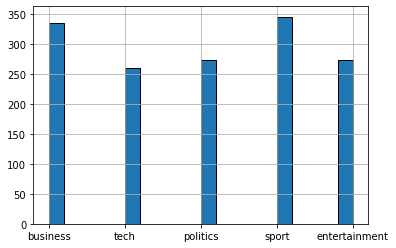

In [21]:
data_news['Category'].hist(edgecolor='black', bins=20);

In [23]:
data_news[categorical_vars].describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


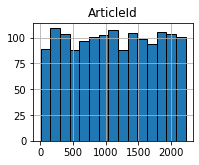

In [24]:
data_news[categorical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2, 4));

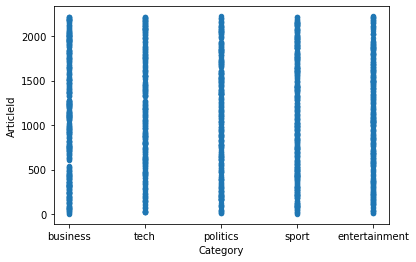

In [27]:
data_news.plot.scatter(x='Category', y='ArticleId');

AttributeError: 'PathCollection' object has no property 'join_kws'

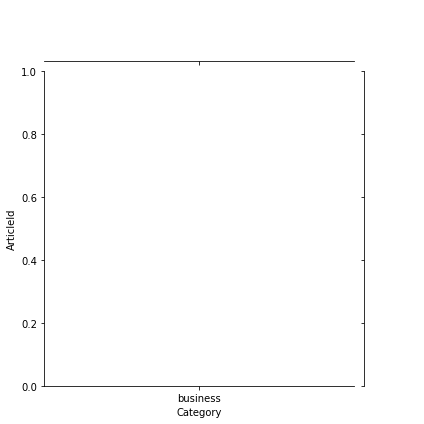

In [28]:
sns.jointplot(x='Category', y='ArticleId', data=data_news, join_kws={"s": 10});

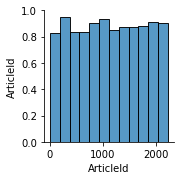

In [29]:
sns.pairplot(data_news[categorical_vars[:4]], plot_kws={"s": 10});

In [31]:
data_news[categorical_vars].corr()

,ArticleId
ArticleId,1.0


In [33]:
correlation = data_news[categorical_vars].corr()

NameError: name 'correlations' is not defined

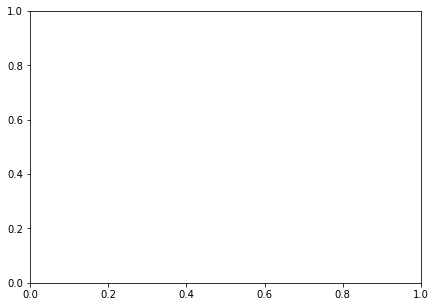

In [34]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);